In [1]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from matplotlib import pyplot
import numpy

import electrostatics
from electrostatics import LineCharge
from electrostatics import GaussianCircle, ElectricField
from electrostatics import finalize_plot


In [2]:

def reimannsum(fct,a,b,n):
        k =8.99e9
        h = (b-a)/n
        x = [a+h*(i+.5) for i in range(n)]
        x = numpy.array(x)
        y = fct(x,1e-6)*h
        #print(x)
       # print(y)
        return numpy.sum(y)
        
        
def lineonaxis(x,lam):
    k = 8.99e9
    return k*lam/x**2

def riemannplot(fct,a,b,n,lam):
  if n<=0:
    print("Error: n must be positive")
    return False
  smoothh= (b-a)/100.0
  x = numpy.arange(a,b+smoothh,smoothh)
  pyplot.plot(x,fct(x,lam))
  h = (b-a)/n
  #print(h)
  riemannx = numpy.arange(a,b,h)
  #print(riemannx)
  riemanny = fct(riemannx,lam)
  pyplot.bar(riemannx,riemanny,width=h,alpha=0.5,facecolor='orange')
  pyplot.xlabel('x')
  pyplot.ylabel('f(x)')
  pyplot.title('Riemann Left Sum for f(x)')
  #pyplot.xlim(-1,2)
  pyplot.show()



def f(x):
  return x**3-2*x**2+0.5*x+0.5

In [3]:
def in_func(n):
    riemannplot(lineonaxis,2.0,5.0,n,1e-6)
    print("the value of the reimann sum where n =",n,"is",reimannsum(lineonaxis,2,5,n),"N/C")
    
i = interact(in_func,n=(2,350,2))

# Electric field by numerical approximation

A thin rod has length $L$ and total charge $Q$ spread uniformly along its length.  Find the electric field a a point, $P$, a distance, $d$, from the left end of the rod.  

Consider breaking this rod into short segments each with the same length as in the image below.

![alt text](rod_reimann.png "Title")

## Exercise Set 1

1. Find the charge, $\Delta Q$ on each segment.
+ Find the distance, $x_i$, the centre of each segment is from the point $P$.
+ Treating each segment as a point charge centred at its centre point, calculate the electric field at $P$ for each segment.
+ Show that the total field at the point $P$ is
\begin{equation}
 E = \displaystyle\sum_{i=0}^n \frac{k\lambda \Delta x}{x_i^2},
\end{equation}
where $\lambda = Q/L$ is **the Linear Charge Density**.

The summation we obtained in the last problem is known as a Reimann Sum. If we let $\Delta x \rightarrow 0$ we get, the known result
\begin{equation}
 E = \lim_{\Delta x \rightarrow 0} \displaystyle\sum_{i=0}^n \frac{k\lambda \Delta x}{x_i^2} = \int_d^{d+L} \frac{k\lambda}{x^2} dx.
\end{equation}





magnitude of field = 89918.0469446
field vector = [-89918.04694457      0.        ]


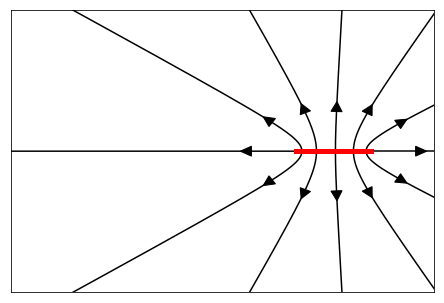

In [4]:

# pylint: disable=invalid-name

XMIN, XMAX = -40, 40
YMIN, YMAX = -30, 30
ZOOM = 14
XOFFSET = 0

electrostatics.init(XMIN, XMAX, YMIN, YMAX, ZOOM, XOFFSET)

# Set up the charges and electric field
a = 2
charges = [LineCharge(20.0e-6, [1, 0], [2, 0])]
field = ElectricField(charges)

print("magnitude of field =",field.magnitude([0,0]))
print("field vector =",charges[0].E([0,0]))

# Set up the Gaussian surface
g = GaussianCircle([0, 0], 29)

# Create the field lines
fieldlines = []
for x in g.fluxpoints(field, 12):
    fieldlines.append(field.line(x))

# Plotting
#pyplot.figure(figsize=(6, 4.5))
#pyplot.grid()
#field.plot()


for fieldline in fieldlines:
    fieldline.plot()
for charge in charges:
    charge.plot()
finalize_plot()
pyplot.grid()
pyplot.show()

